In [1]:
import numpy as np
import scipy as sp
import keras
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


Loading data

In [3]:
AAs = np.load("/media/bigger/hiranumn/torsion_data/AAs.npy")
Phis = np.load("/media/bigger/hiranumn/torsion_data/Phis.npy")
Psis = np.load("/media/bigger/hiranumn/torsion_data/Psis.npy")

In [4]:
print AAs.shape, Phis.shape, Psis.shape

(2305381, 15, 20) (2305381, 15, 32) (2305381, 15, 32)


Building a keras model (LSTM)

In [2]:
model = keras.models.Sequential()

# Bidirectinal LSTM layer
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True), 
                                     input_shape=(15, 20), merge_mode="concat"))
model.add(keras.layers.Dropout(0.3))

# Bidirectinal LSTM layer
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True), 
                                     input_shape=(15, 20), merge_mode="concat"))
model.add(keras.layers.Dropout(0.3))

# Bidirectinal LSTM layer
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True), 
                                     input_shape=(15, 20), merge_mode="concat"))
model.add(keras.layers.Dropout(0.3))

# Add time distributed Dense
model.add(keras.layers.TimeDistributed(keras.layers.Dense(32, activation= None)))
model.add(keras.layers.TimeDistributed(keras.layers.Activation("softmax")))

# Adding Loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the network

In [5]:
history = model.fit(AAs, Phis, validation_split=0.1, epochs=1)

Train on 2074842 samples, validate on 230539 samples
Epoch 1/1
2074842/2074842 [==============================] - 9409s 5ms/step - loss: 2.0246 - acc: 0.3308 - val_loss: 1.9990 - val_acc: 0.3352


Predicting

In [6]:
testAAs = np.load("/media/bigger/hiranumn/torsion_data/AAs_test.npy")
testPhis = np.load("/media/bigger/hiranumn/torsion_data/Phis_test.npy")
testPsis = np.load("/media/bigger/hiranumn/torsion_data/Psis_test.npy")

In [7]:
predictions  = model.predict(testAAs)

Visualizing predictions

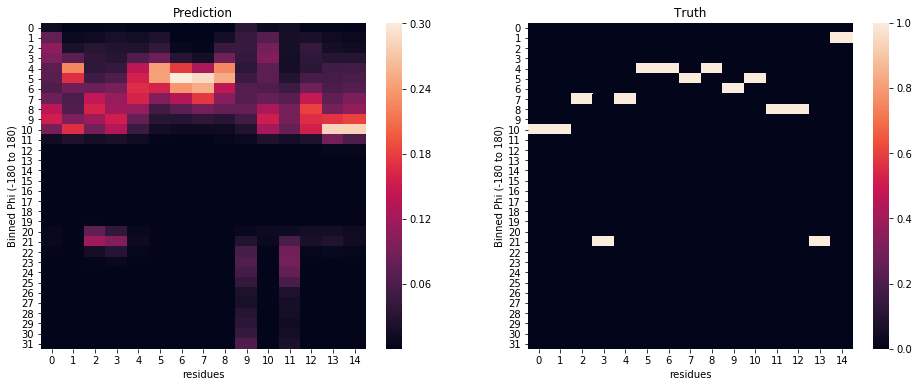

In [31]:
index = np.random.randint(100000)
predicted_phis = predictions[index]
true_phis = testPhis[index]

plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title("Prediction")
sns.heatmap(np.transpose(predicted_phis))
plt.ylabel('Binned Phi (-180 to 180)')
plt.xlabel('residues')

plt.subplot(122)
sns.heatmap(np.transpose(true_phis))
plt.title("Truth")
plt.ylabel('Binned Phi (-180 to 180)')
plt.xlabel('residues')
plt.show()

Assessing the quality

In [13]:
loss1 = -1*np.mean(np.sum(np.multiply(np.log(predictions), testPhis), axis=-1))

In [14]:
print loss1

2.0040900158990973


In [15]:
loss2 = -1*np.mean(np.sum(np.multiply(np.log(np.ones(predictions.shape)/32), testPhis), axis=-1))

In [16]:
print loss2

3.4657359027998433


In [17]:
position_mean = np.mean(np.mean(Phis, axis=1), axis=0)
temp = np.vstack([position_mean]*15)
temp = np.stack([temp]*1568999)

In [18]:
loss3 = -1*np.mean(np.sum(np.multiply(np.log(temp), testPhis), axis=-1))

In [19]:
print loss3

2.3551784485689446
